In [27]:

import numpy as np
import os 
import pandas as pd
#from pandas_profiling import ProfileReport
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import ensemble, tree, linear_model
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from scipy.stats import pearsonr
#import pyodbc
import seaborn as sns
sns.set()
#plt.style.use('seaborn')
import re
from scipy import stats
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import ks_2samp
from scipy.stats import norm
#import missingno as msno
import warnings
import datetime
warnings.filterwarnings("ignore")
import nltk
#nltk.download('popular')
nltk.download('punkt')
nltk.download('wordnet')



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Gil\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Gil\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [28]:
df_panel = pd.read_pickle('df_panel.pkl')
df_panel


df_eda= df_panel[[ 

    'Host Response Time', 
    'Host Response Rate',
    'neighbourhood', 
    'Neighborhood Group', 
    'City', 
    'Country Code',
    'Room Type', 
    'Accomodates',
    'Bathrooms', 
    'Bedrooms', 
    'Beds', 
    'Price',
    'Guests Included', 
    'Min Nights', 
    'Reviews', 
    'Overall Rating', 
    'Accuracy Rating',
    'Cleanliness Rating', 
    'Checkin Rating', 
    'Communication Rating',
    'Location Rating', 
    'Value Rating', 
    'Is Superhost_ind',
    'Is Exact Location_ind', 
    'Instant Bookable_ind', 
    'Top10Neighbourhood', 
    'Property Type_groups']]




#dates fileds 
 #   'Host Since', 
 #   'First Review',
 #   'Last Review', 
#category fildes with high cardinality
 #   'Latitude', 
 #   'Longitude', 
 #   'Postal Code_n',
 #   'Property Type', 
 #   'Listing ID', 
 #   'Listing Name', 
 #   'Host ID', 
 #   'Host Name',

# Get only the numerical columns
numerical_df = df_panel.select_dtypes(include=['number'])

In [29]:
# Type of values
df_panel.dtypes.to_csv("AirBnB_dtypes.csv",index=False)
# Maximum valaues 
# Maximum valaues 
numerical_df.max().to_csv("max_AirBnB.csv",index=False)
# Minimum Values
numerical_df.min().to_csv("min_AirBnB.csv",index=False)
# Missing Values
df_panel.isnull().sum(axis=0).to_csv("numerical_df.csv",index=False)
# exporting results to the protocol
df_panel.nunique().to_csv("unique_AirBnB.csv",index=False)
print(df_panel.shape)
df_eda.info()

(14251, 38)
<class 'pandas.core.frame.DataFrame'>
Index: 14251 entries, 65536 to 456958
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Host Response Time     8598 non-null   string 
 1   Host Response Rate     8598 non-null   float64
 2   neighbourhood          14251 non-null  string 
 3   Neighborhood Group     14251 non-null  string 
 4   City                   14248 non-null  string 
 5   Country Code           14251 non-null  string 
 6   Room Type              14251 non-null  string 
 7   Accomodates            14251 non-null  int64  
 8   Bathrooms              14235 non-null  float64
 9   Bedrooms               14237 non-null  float64
 10  Beds                   14227 non-null  float64
 11  Price                  14251 non-null  float64
 12  Guests Included        14251 non-null  int64  
 13  Min Nights             14251 non-null  int64  
 14  Reviews                14251 non-null  int

In [30]:
from autoviz.AutoViz_Class import AutoViz_Class
%matplotlib inline

In [31]:
#AV = AutoViz_Class()
#AV.AutoViz('', dfte=df_eda)


In [32]:

df_eda.head()

,Host Response Time,Host Response Rate,neighbourhood,Neighborhood Group,City,Country Code,Room Type,Accomodates,Bathrooms,Bedrooms,Beds,Price,Guests Included,Min Nights,Reviews,Overall Rating,Accuracy Rating,Cleanliness Rating,Checkin Rating,Communication Rating,Location Rating,Value Rating,Is Superhost_ind,Is Exact Location_ind,Instant Bookable_ind,Top10Neighbourhood,Property Type_groups
65536,within a few hours,1.0,Mitte,Mitte,Berlin,DE,Entire home/apt,6,1.0,2.0,4.0,109.0,2,5,118,95.0,10.0,10.0,10.0,10.0,10.0,9.0,1,1,0,Mitte,Apartment
65603,<NA>,NaN,NeukÃ¶lln,NeukÃ¶lln,Berlin,DE,Entire home/apt,2,1.0,1.0,2.0,50.0,1,2,22,96.0,10.0,9.0,10.0,10.0,9.0,10.0,0,1,0,NeukÃ¶lln,Apartment
65625,<NA>,NaN,Mitte,Mitte,Berlin,DE,Private room,2,1.0,1.0,1.0,69.0,2,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,1,Mitte,Apartment
65626,<NA>,NaN,Charlottenburg,Charlottenburg-Wilm.,Berlin,DE,Private room,2,1.0,1.0,1.0,30.0,1,1,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0,1,0,Charlottenburg,Apartment
65627,<NA>,NaN,Prenzlauer Berg,Pankow,Berlin,DE,Private room,1,1.0,1.0,1.0,25.0,1,2,7,97.0,9.0,10.0,10.0,10.0,10.0,10.0,0,0,0,Prenzlauer Berg,Apartment


In [33]:
df_eda.describe()

,Host Response Rate,Accomodates,Bathrooms,Bedrooms,Beds,Price,Guests Included,Min Nights,Reviews,Overall Rating,Accuracy Rating,Cleanliness Rating,Checkin Rating,Communication Rating,Location Rating,Value Rating,Is Superhost_ind,Is Exact Location_ind,Instant Bookable_ind
count,8598.000000,14251.000000,14235.000000,14237.000000,14227.000000,14251.000000,14251.000000,14251.000000,14251.000000,11184.000000,11170.000000,11174.000000,11160.000000,11170.000000,11163.000000,11161.000000,14238.0,14251.0,14251.0
mean,0.916989,2.689285,1.095750,1.156494,1.652351,76.301382,1.342783,6.687952,15.857624,94.524678,9.676634,9.322355,9.724731,9.742883,9.554510,9.413583,0.145596,0.755105,0.362431
std,0.194795,1.602852,0.349129,0.666257,1.240301,274.932766,0.867928,23.884534,36.362724,7.984410,0.761341,1.068615,0.721340,0.709954,0.768581,0.869995,0.352713,0.43004,0.480719
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.0,0.0,0.0
25%,0.940000,2.000000,1.000000,1.000000,1.000000,33.000000,1.000000,2.000000,1.000000,92.000000,10.000000,9.000000,10.000000,10.000000,9.000000,9.000000,0.0,1.0,0.0
50%,1.000000,2.000000,1.000000,1.000000,1.000000,50.000000,1.000000,2.000000,4.000000,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,0.0,1.0,0.0
75%,1.000000,3.000000,1.000000,1.000000,2.000000,75.000000,1.000000,4.000000,13.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,0.0,1.0,1.0
max,1.000000,16.000000,8.500000,8.000000,16.000000,9000.000000,16.000000,1000.000000,545.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.0,1.0,1.0


In [34]:
cols_dummy= ['Is Superhost_ind','Is Exact Location_ind', 'Instant Bookable_ind' ]
dum_df = df_eda[cols_dummy]
dum_df

,Is Superhost_ind,Is Exact Location_ind,Instant Bookable_ind
65536,1,1,0
65603,0,1,0
65625,0,1,1
65626,0,1,0
65627,0,0,0
...,...,...,...
456582,0,0,0
456585,0,0,0
456605,1,1,1
456954,0,0,0


In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

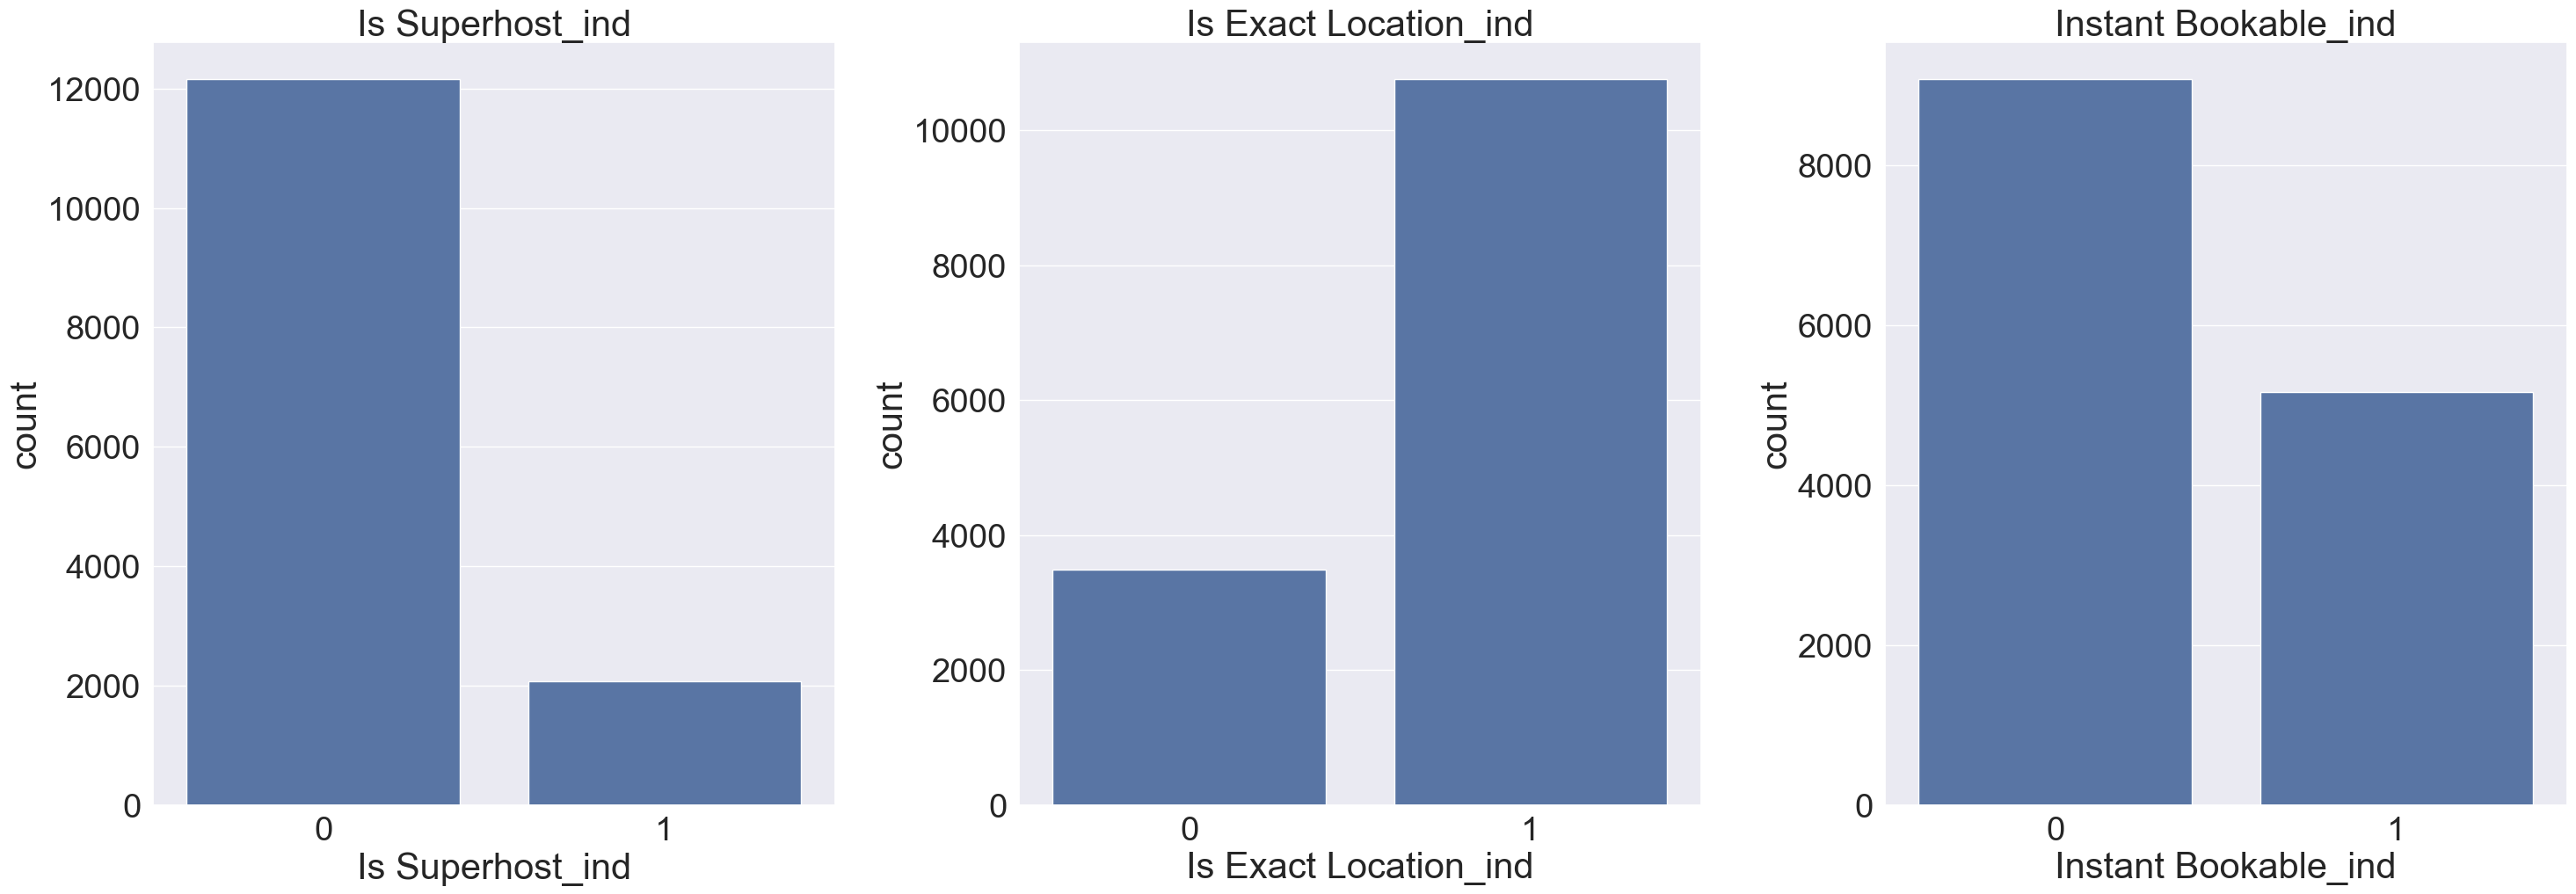

In [36]:
a = 2  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(30,20))
plt.subplots_adjust(hspace = 0.5)
sns.set(font_scale = 2.5)
for col in dum_df:
    
        plt.subplot(a, b, c)
        plt.title('{}'.format(col))
        plt.xlabel(col)
        sns.countplot(data=dum_df, x=col)
        c = c + 1
    
fig.tight_layout()
plt.show()

In [37]:
cols_cat= ['Neighborhood Group',  'Country Code','Room Type','Top10Neighbourhood', 'Property Type_groups']
cat_df = df_eda[cols_cat]
cat_df

,Neighborhood Group,Country Code,Room Type,Top10Neighbourhood,Property Type_groups
65536,Mitte,DE,Entire home/apt,Mitte,Apartment
65603,NeukÃ¶lln,DE,Entire home/apt,NeukÃ¶lln,Apartment
65625,Mitte,DE,Private room,Mitte,Apartment
65626,Charlottenburg-Wilm.,DE,Private room,Charlottenburg,Apartment
65627,Pankow,DE,Private room,Prenzlauer Berg,Apartment
...,...,...,...,...,...
456582,Treptow - KÃ¶penick,DE,Entire home/apt,Other,Apartment
456585,Lichtenberg,DE,Private room,Other,Apartment
456605,Friedrichshain-Kreuzberg,DE,Entire home/apt,Kreuzberg,Apartment
456954,Friedrichshain-Kreuzberg,DE,Entire home/apt,Friedrichshain,Apartment


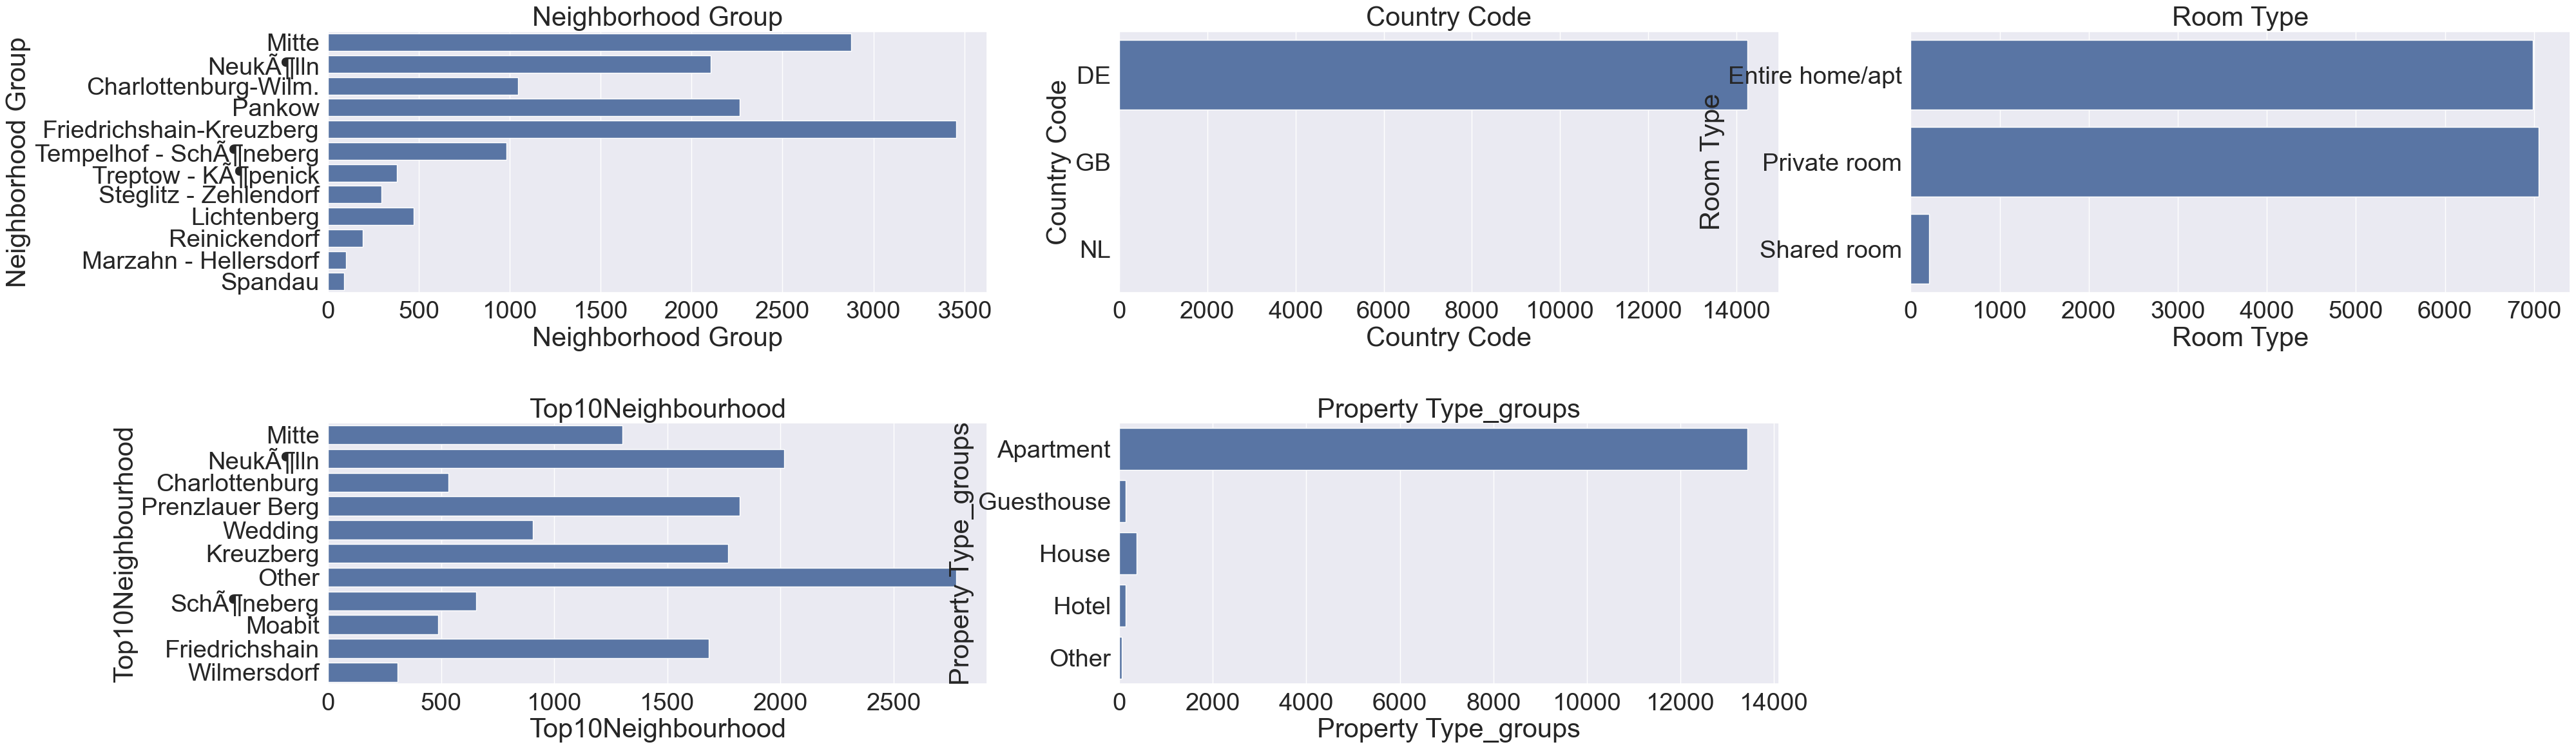

In [38]:
a = 3  # number of rows
b = 3  # number of columns
c = 1  # plot counter

fig = plt.figure(figsize=(40,20))
plt.subplots_adjust(hspace = 0.5)
sns.set(font_scale = 2.5)
for i in cat_df:

        plt.subplot(a, b, c)
        plt.title('{}'.format(i))
        plt.xlabel(i)
        sns.countplot(cat_df[i])
        c = c + 1

plt.show()

In [39]:
cols= [
    'Accomodates',
    'Bathrooms', 
    'Bedrooms', 
    'Beds', 
    'Guests Included', 
    'Min Nights', 
    'Reviews', 
    'Overall Rating', 
    'Accuracy Rating',
    'Cleanliness Rating', 
    'Checkin Rating', 
    'Communication Rating',
    'Location Rating', 
    'Value Rating'    
      ]
con_df = df_eda[cols]
y= df_eda[df_eda['Price'].notnull() & (df_eda['Price'] > 0)]
y[['Price']].describe()

,Price
count,14250.000000
mean,76.306737
std,274.941670
min,1.000000
25%,33.000000
50%,50.000000
75%,75.000000
max,9000.000000


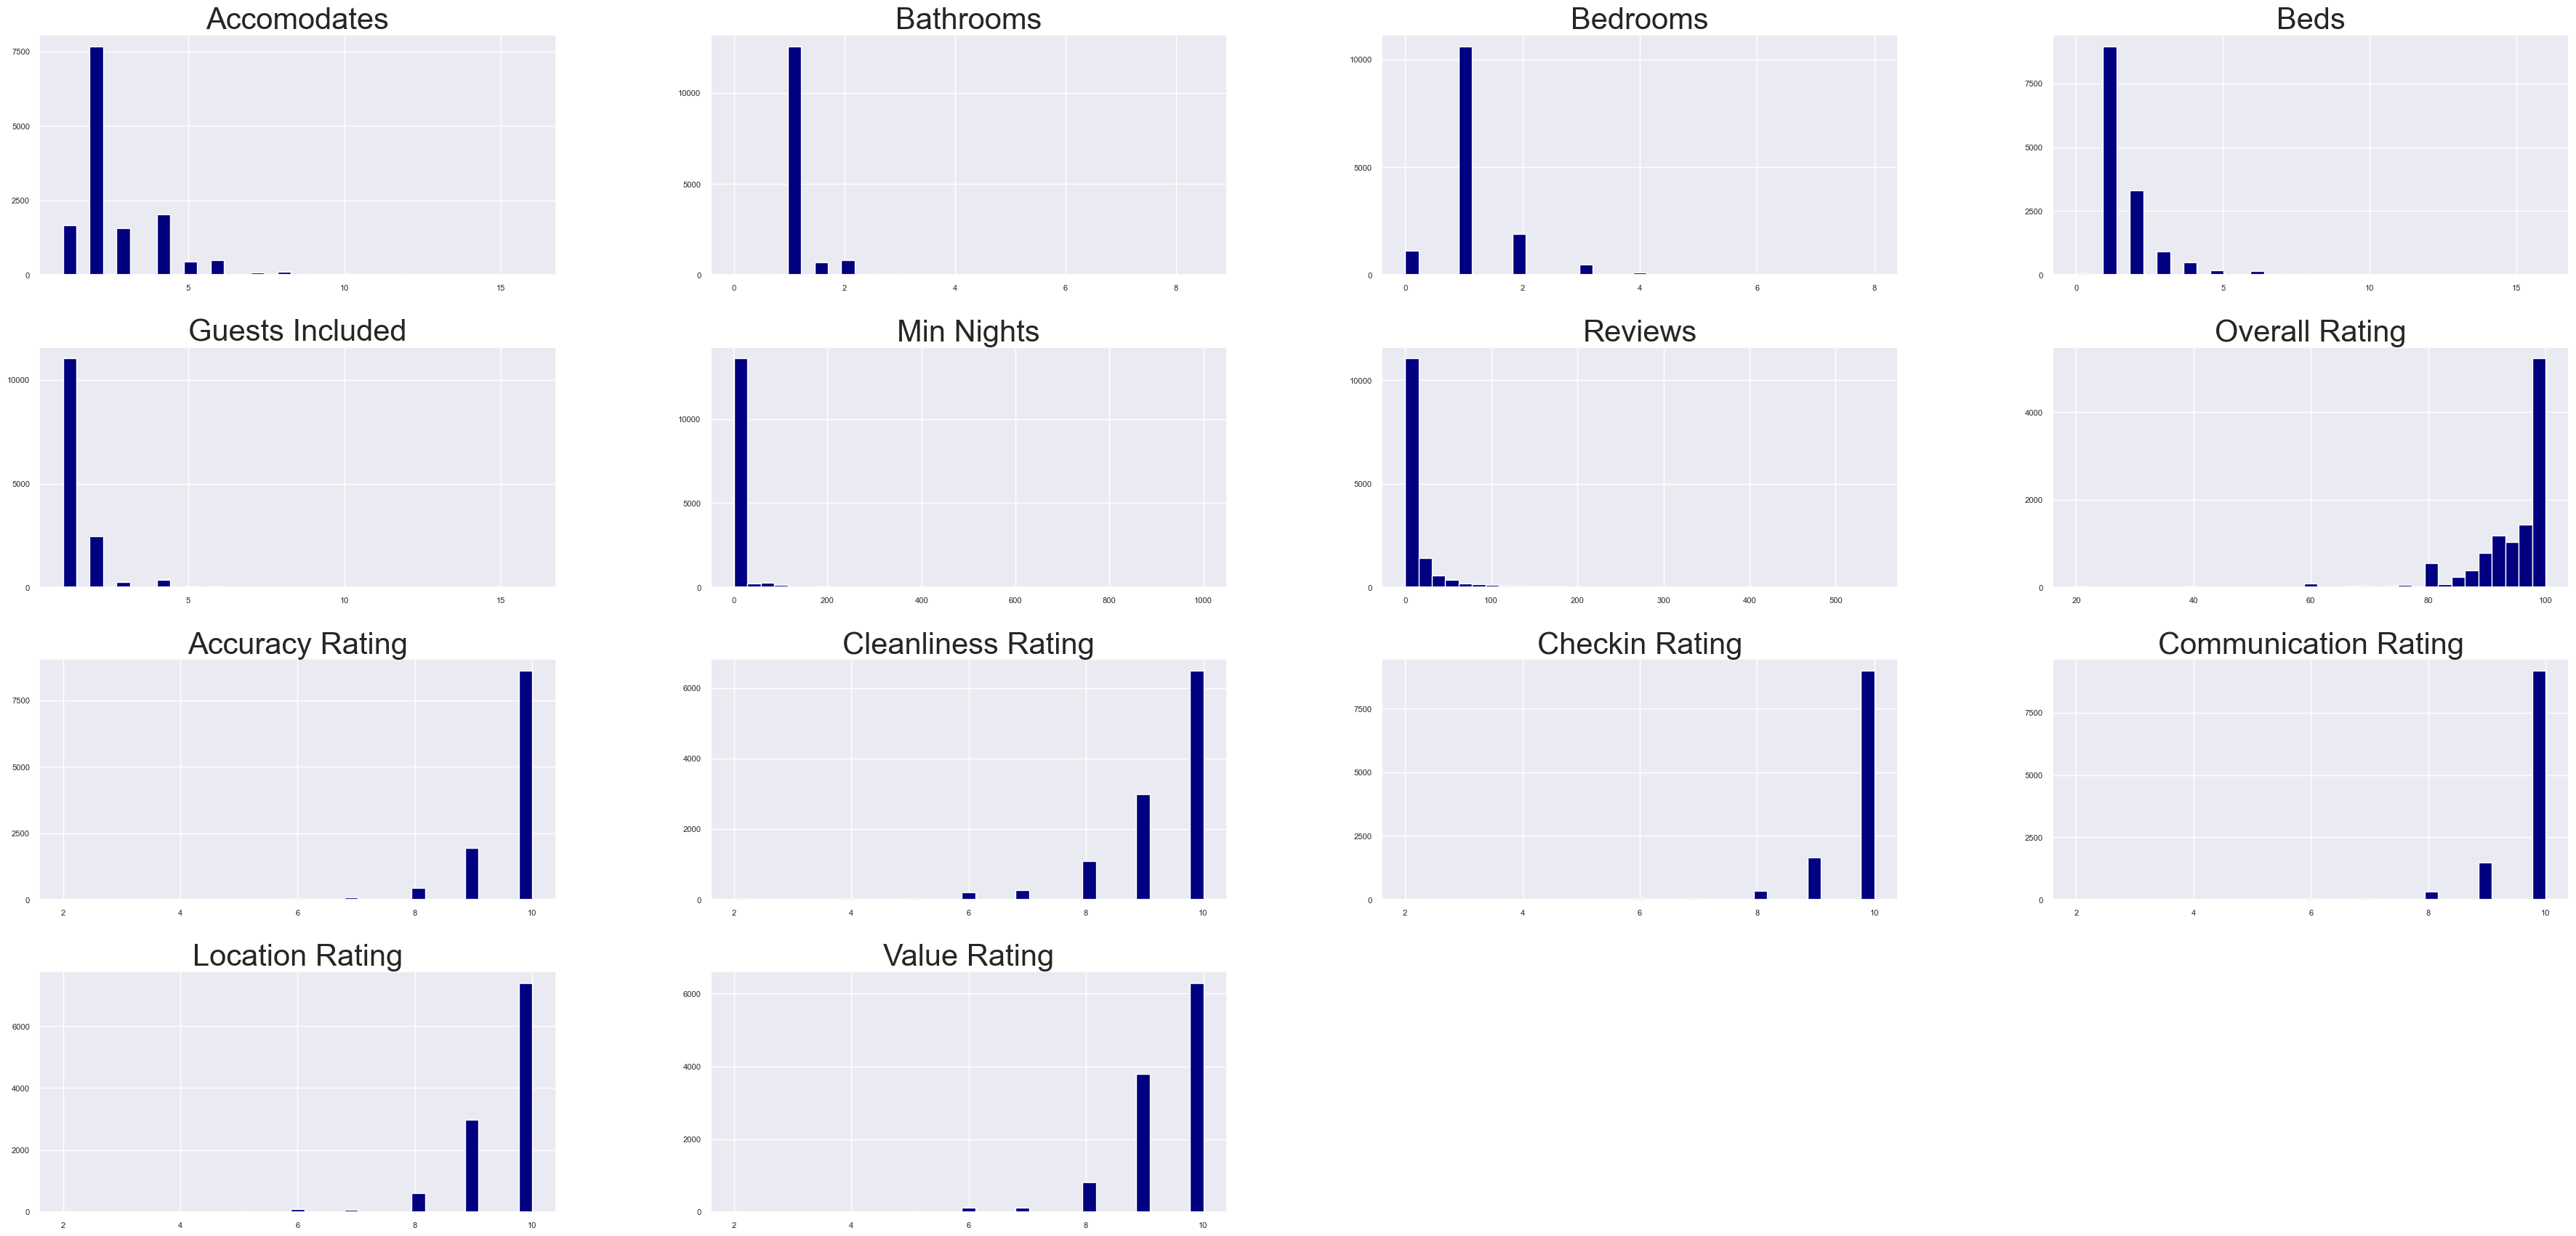

In [40]:
con_df.hist(figsize=(40, 20), bins=35, xlabelsize=8, ylabelsize=8, color = "navy");

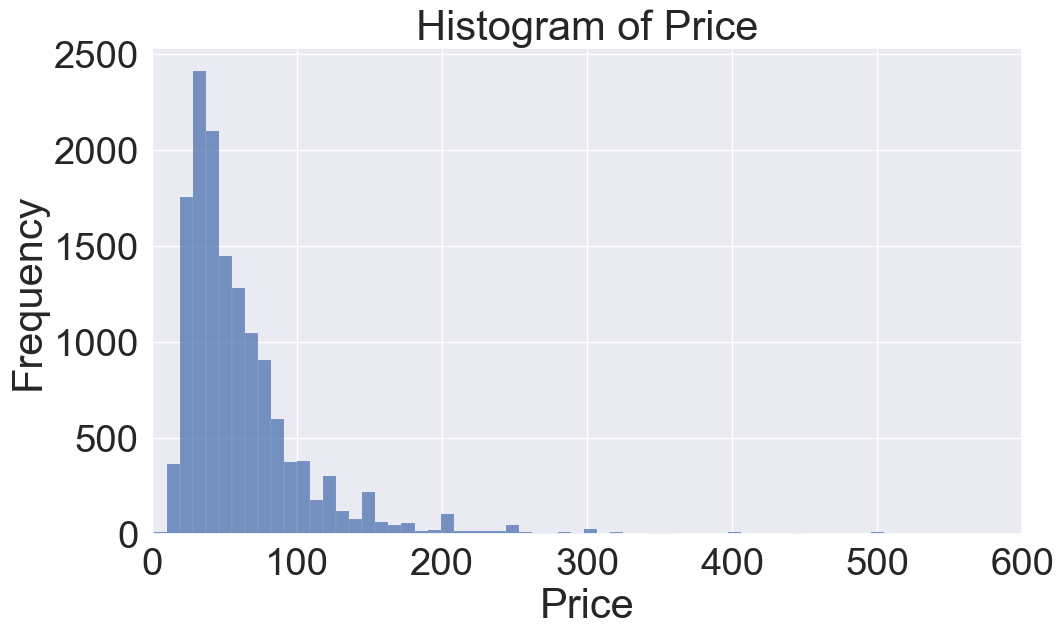

In [41]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
sns.histplot(y['Price'], kde=False, bins=1000)
plt.title('Histogram of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.xlim(0, 600)  # Set x-axis limit from 0 to 1000
plt.show()

In [42]:

cols_cat= ['Neighborhood Group',  'Country Code','Room Type','Top10Neighbourhood', 'Property Type_groups',  'Host Response Time', 'neighbourhood','City' ]
df1=df_eda.drop(cols_cat, axis=1)
df1.corr()


,Host Response Rate,Accomodates,Bathrooms,Bedrooms,Beds,Price,Guests Included,Min Nights,Reviews,Overall Rating,Accuracy Rating,Cleanliness Rating,Checkin Rating,Communication Rating,Location Rating,Value Rating,Is Superhost_ind,Is Exact Location_ind,Instant Bookable_ind
Host Response Rate,1.000000,0.068298,0.027716,0.035709,0.061658,0.031215,0.078939,-0.031157,0.111754,0.048806,0.034777,0.095900,0.060766,0.071152,0.017775,0.031365,0.168725,0.042101,0.168028
Accomodates,0.068298,1.000000,0.260120,0.626440,0.804588,0.096662,0.527837,-0.008963,0.105942,-0.051987,-0.045098,0.001359,-0.014921,-0.024978,-0.046795,-0.094923,0.046982,0.039258,0.074394
Bathrooms,0.027716,0.260120,1.000000,0.322238,0.267803,0.048935,0.181007,-0.001904,0.006492,0.019540,0.010292,0.017683,0.010037,0.014331,0.004098,-0.001894,0.042447,0.035820,0.017429
Bedrooms,0.035709,0.626440,0.322238,1.000000,0.611373,0.078106,0.384314,0.018930,0.029376,0.013307,-0.005048,0.030859,0.018626,0.004927,-0.020628,-0.013166,0.031190,0.027209,-0.010132
Beds,0.061658,0.804588,0.267803,0.611373,1.000000,0.070760,0.479097,0.007035,0.085925,-0.066089,-0.062898,-0.004033,-0.027278,-0.042699,-0.070057,-0.087163,0.030552,0.033328,0.059520
Price,0.031215,0.096662,0.048935,0.078106,0.070760,1.000000,0.094281,-0.002302,-0.011603,-0.032097,-0.058203,-0.006868,0.015961,-0.000550,0.011782,-0.047201,-0.001193,-0.051347,0.061945
Guests Included,0.078939,0.527837,0.181007,0.384314,0.479097,0.094281,1.000000,-0.013232,0.106533,-0.010910,0.000838,0.025469,0.013020,0.002346,-0.015907,-0.041507,0.080755,0.007955,0.058788
Min Nights,-0.031157,-0.008963,-0.001904,0.018930,0.007035,-0.002302,-0.013232,1.000000,-0.035658,0.003726,0.002381,0.007435,-0.007120,-0.001814,-0.010683,-0.022031,-0.003340,0.032097,-0.040964
Reviews,0.111754,0.105942,0.006492,0.029376,0.085925,-0.011603,0.106533,-0.035658,1.000000,0.007052,0.059377,0.083921,0.061465,0.050261,0.049283,0.012815,0.326140,0.047143,0.085544
Overall Rating,0.048806,-0.051987,0.019540,0.013307,-0.066089,-0.032097,-0.010910,0.003726,0.007052,1.000000,0.680186,0.685504,0.523841,0.590108,0.420074,0.703022,0.158288,0.017437,-0.058235


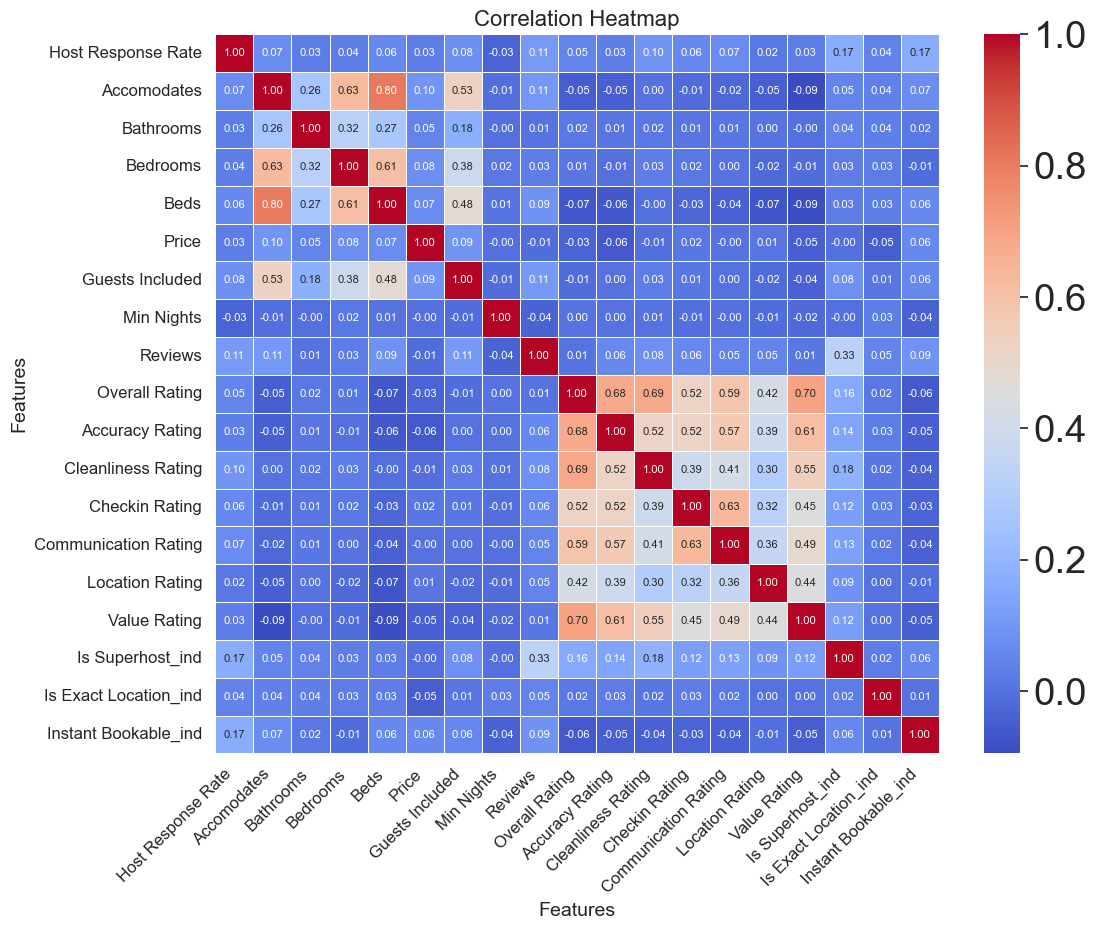

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate correlation matrix
correlation_matrix = df1.corr()

# Set up the matplotlib figure with a larger size
plt.figure(figsize=(12, 10))  # Increase figure size

# Create the heatmap with annotations
ax = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, annot_kws={"size": 8})

# Set the title for the heatmap and adjust font size
plt.title('Correlation Heatmap', fontsize=16)

# Set x and y labels and adjust font size
plt.xlabel('Features', fontsize=14)
plt.ylabel('Features', fontsize=14)

# Adjust tick labels font size and rotation
ax.tick_params(axis='both', labelsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.yticks(rotation=0)  # Ensure y-axis labels are horizontal

# Adjust layout to make room for rotated labels
plt.tight_layout()

# Show the plot
plt.show()


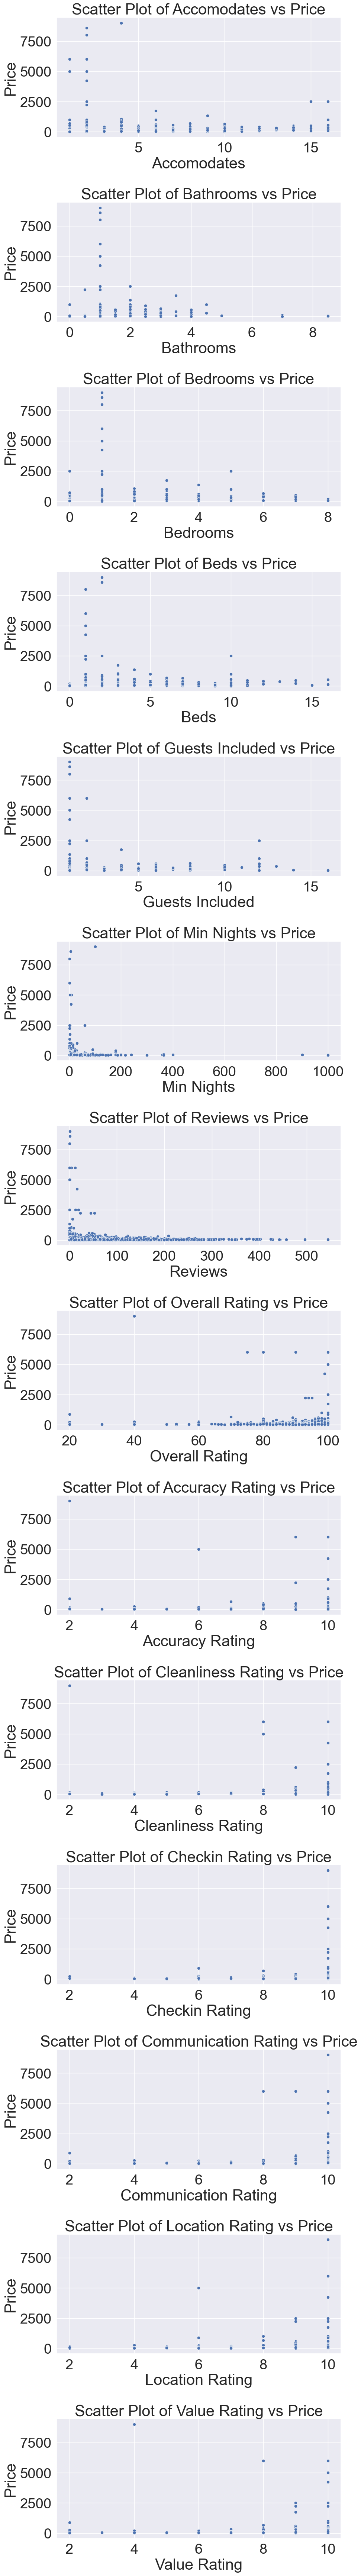

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
numerical_columns= [
    'Accomodates',
    'Bathrooms', 
    'Bedrooms', 
    'Beds', 
    'Guests Included', 
    'Min Nights', 
    'Reviews', 
    'Overall Rating', 
    'Accuracy Rating',
    'Cleanliness Rating', 
    'Checkin Rating', 
    'Communication Rating',
    'Location Rating', 
    'Value Rating'    
      ]
# Assuming df is your DataFrame and 'Price' is your target column
#numerical_columns = df_eda.select_dtypes(include=['int64', 'float64']).columns
#numerical_columns = numerical_columns.drop('Price')  # Exclude target column if present

# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=len(numerical_columns), ncols=1, figsize=(10, len(numerical_columns) * 5))

# Iterate over numerical columns and create scatter plots
for i, col in enumerate(numerical_columns):
    sns.scatterplot(x=df_eda[col], y=df_eda['Price'], ax=axes[i])
    axes[i].set_title(f'Scatter Plot of {col} vs Price')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Price')

# Adjust layout
plt.tight_layout()
plt.show()


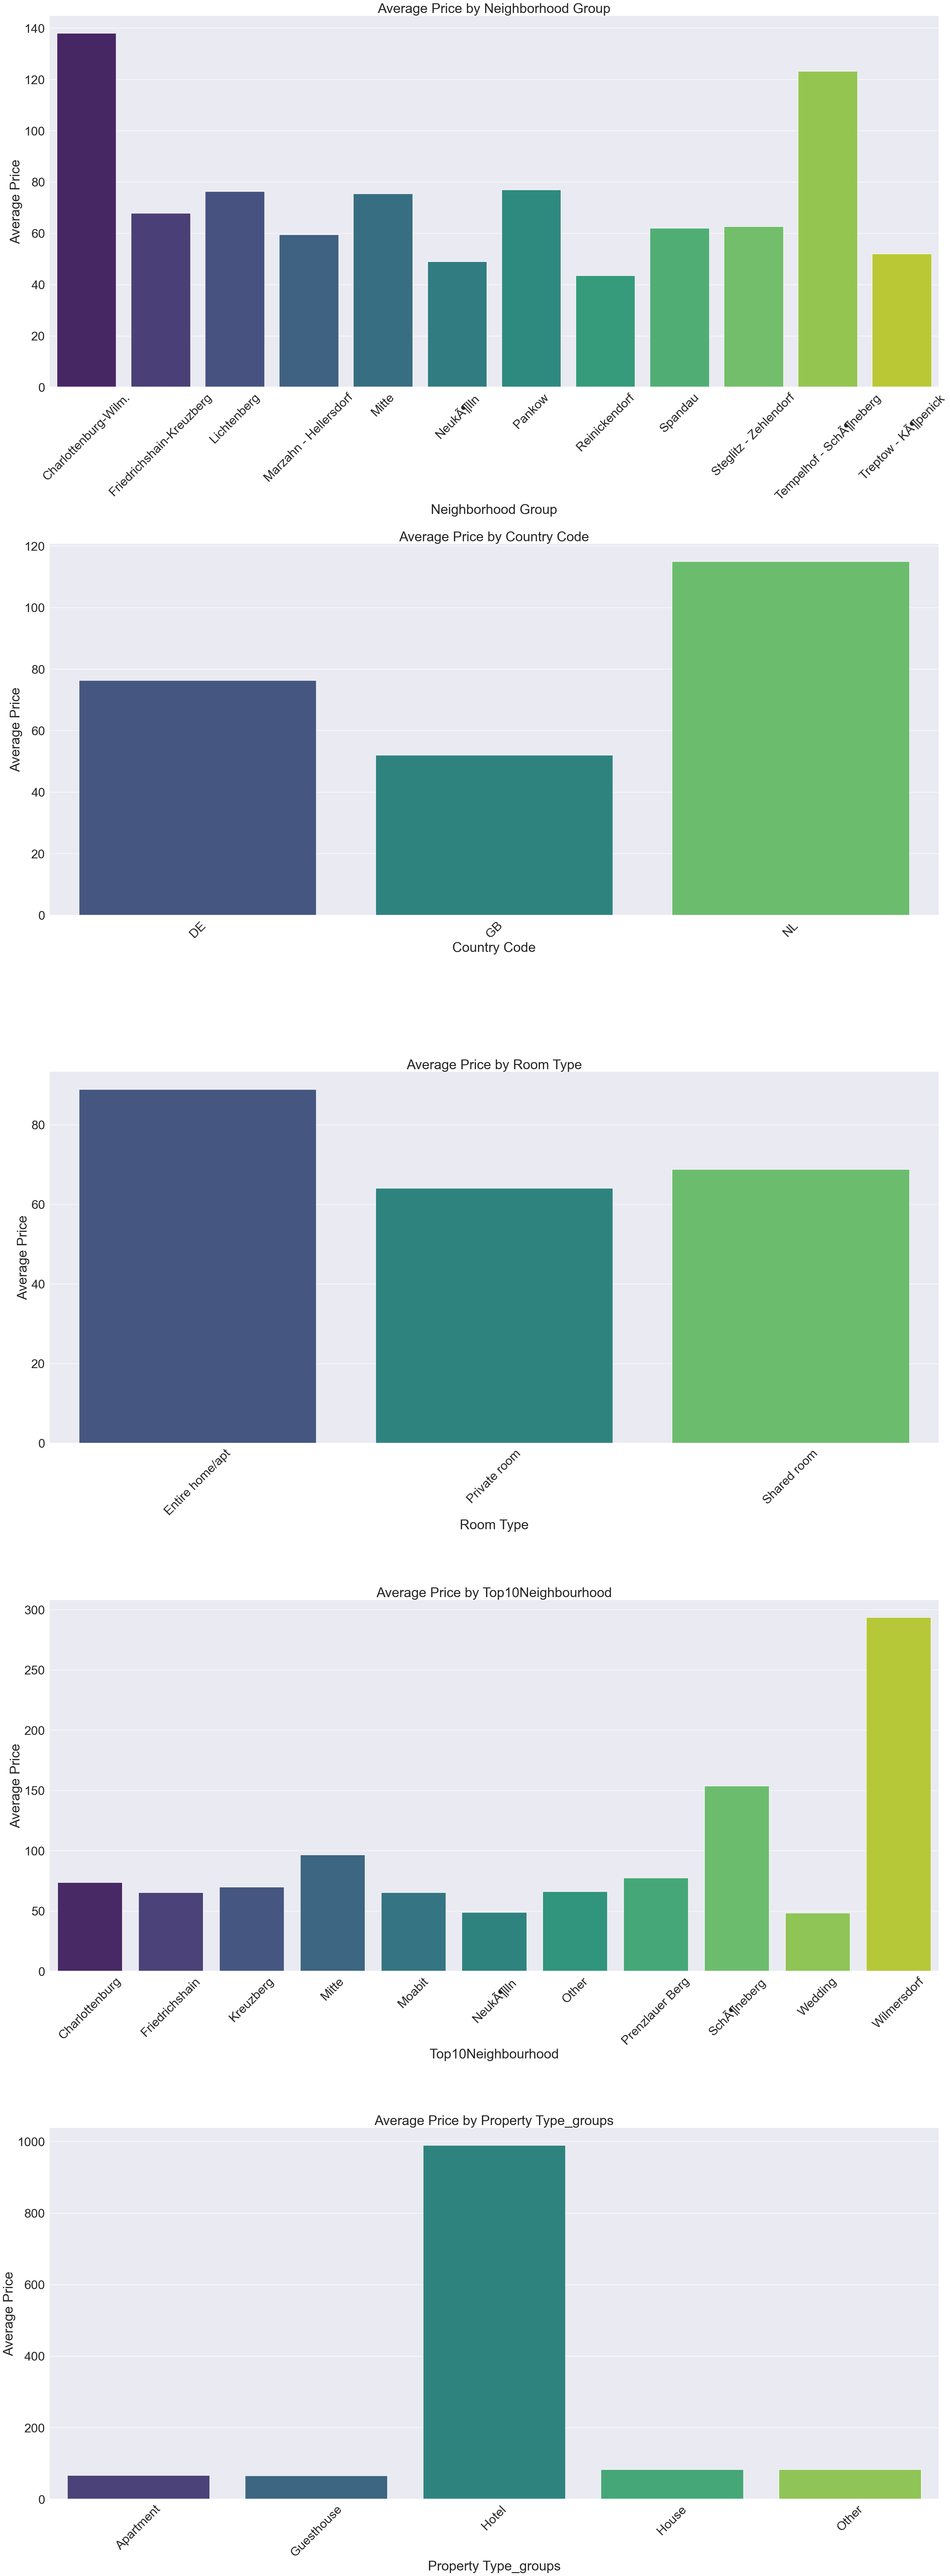

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame and 'Price' is your target column
categorical_columns =  ['Neighborhood Group',  'Country Code','Room Type','Top10Neighbourhood', 'Property Type_groups']

# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=len(categorical_columns), ncols=1, figsize=(30,80))

for i, col in enumerate(categorical_columns):
    # Calculate average price for each category
    avg_price = df_eda.groupby(col)['Price'].mean().reset_index()
    
    # Create bar plot
    sns.barplot(x=col, y='Price', data=avg_price, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Average Price by {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Average Price')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels if necessary

# Adjust layout
plt.tight_layout()
plt.show()

In [46]:
def highlight(cell_value):
    highlight = 'background-color: mediumspringgreen;'
    default = ''
    negative = 'background-color: hotpink;'
    if cell_value > 1:
        return highlight
    elif cell_value < -1:
        return negative
    #else
       # return default  
pd.DataFrame(con_df.skew(),columns=['skewness']).sort_values(by='skewness', ascending=False).style.applymap(highlight)

,skewness
Min Nights,22.135131
Bathrooms,6.786303
Guests Included,5.265886
Reviews,5.155779
Beds,3.431008
Accomodates,2.704737
Bedrooms,1.966558
Cleanliness Rating,-2.547775
Value Rating,-2.828747
Location Rating,-2.839260
